In [29]:
import komm
import numpy as np
import matplotlib.pyplot as plt



In [30]:
code = komm.BlockCode(
    generator_matrix=[
        [1, 0, 0, 0, 1, 1],
        [0, 1, 0, 1, 0, 1],
        [0, 0, 1, 1, 1, 0]
    ]
)

In [31]:
(n, k) = (code.length, code.dimension)
print(f"Code length: {n}, Dimension: {k}")
epsilon = code.coset_leader_weight_distribution
print(f"Coset leader weight distribution: {epsilon}")

Code length: 6, Dimension: 3
Coset leader weight distribution: [1 6 1 0 0 0 0]


In [32]:
def p_word_mdd(epsilon, p):
    soma = 0.0
    n = len(epsilon) - 1 
    for i, e in enumerate(epsilon):
        soma += e * p**i * (1-p)**(n-i)
    return 1 - soma

print(p_word_mdd(epsilon, 0.1))

0.1077039999999998


In [33]:
ps = np.linspace(start=0.0, stop=0.5, num=101)
print(ps)

[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295
 0.3   0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355
 0.36  0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415
 0.42  0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475
 0.48  0.485 0.49  0.495 0.5  ]


In [34]:
Pws_uncoded = np.array([1 - (1-p)**k for p in ps])


Pws_mdd_teo = np.array([p_word_mdd(epsilon, p) for p in ps])


print(Pws_mdd_teo)

[0.00000000e+00 3.45524313e-04 1.36438800e-03 3.03045923e-03
 5.31817626e-03 8.20254004e-03 1.16591069e-02 1.56639813e-02
 2.01938084e-02 2.52257670e-02 3.07375625e-02 3.67074194e-02
 4.31140746e-02 4.99367702e-02 5.71552466e-02 6.47497354e-02
 7.27009526e-02 8.09900919e-02 8.95988178e-02 9.85092586e-02
 1.07704000e-01 1.17166078e-01 1.26878974e-01 1.36826605e-01
 1.46993320e-01 1.57363892e-01 1.67923511e-01 1.78657781e-01
 1.89552710e-01 2.00594704e-01 2.11770563e-01 2.23067471e-01
 2.34472997e-01 2.45975079e-01 2.57562026e-01 2.69222509e-01
 2.80945553e-01 2.92720535e-01 3.04537176e-01 3.16385533e-01
 3.28256000e-01 3.40139293e-01 3.52026452e-01 3.63908832e-01
 3.75778096e-01 3.87626212e-01 3.99445448e-01 4.11228362e-01
 4.22967804e-01 4.34656902e-01 4.46289062e-01 4.57857964e-01
 4.69357551e-01 4.80782029e-01 4.92125858e-01 5.03383751e-01
 5.14550665e-01 5.25621799e-01 5.36592585e-01 5.47458689e-01
 5.58216000e-01 5.68860629e-01 5.79388903e-01 5.89797359e-01
 6.00082743e-01 6.102420

<Figure size 640x480 with 0 Axes>

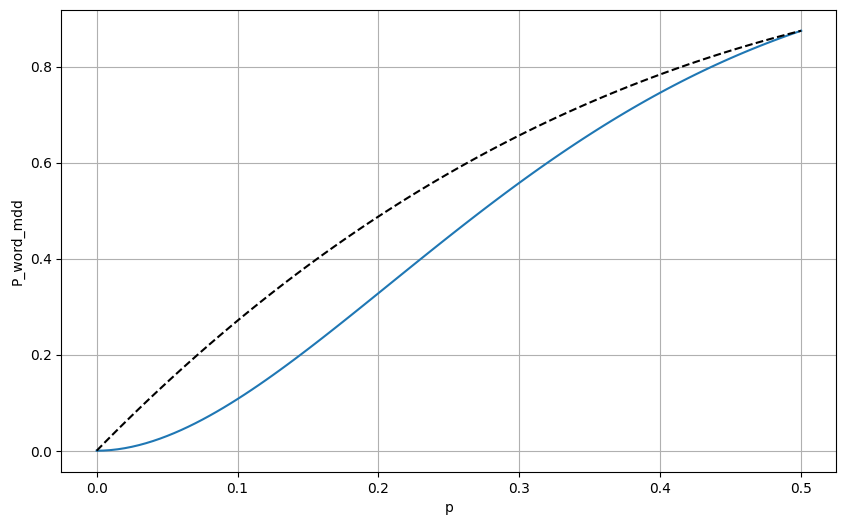

In [35]:
plt.figure()
plt.figure(figsize=(10, 6))
plt.plot(ps, Pws_mdd_teo, label="P_word_mdd")
plt.plot(ps, Pws_uncoded, 'k--', label="P_word_uncoded")
plt.xlabel("p")
plt.ylabel("P_word_mdd")
plt.grid()
plt.show()

In [43]:
# Simulação
Nb = 10 # Número de blocos
p = 0.3 # Probabilidade de erro


encoder = komm.BlockEncoder(code)


u = np.random.randint(0, 2, Nb*k)

v = encoder(u)

print(v)
print(v.shape)

[0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1
 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1]
(60,)


In [37]:
channel = komm.BinarySymmetricChannel(p)

b = channel(v)

print(b)


[0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1
 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1]


In [42]:
decoder = komm.BlockDecoder(code)

u_hat = decoder(b)

print(u)
print(u_hat)

[0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0]
[0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0]


In [46]:
u1 = (np.reshape(u, (Nb, k)))
u1_hat = (np.reshape(u_hat, (Nb, k)))

print((sum([ not np.array_equal(x, y) for x, y in zip(u1, u1_hat)]) / Nb) * 100, "%") 



90.0 %
